# asset sales



[-0.5 -0.4 -0.3 -0.2 -0.1]


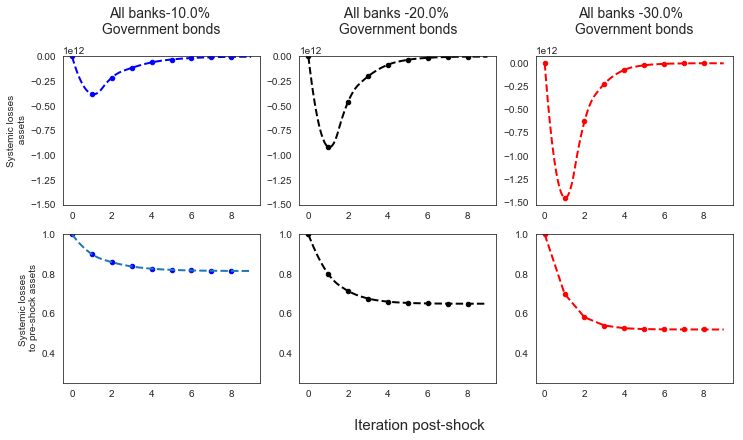

In [56]:
#run the whole thing
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import numpy
from numpy.random import randn
from scipy import array, newaxis
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.interpolate import InterpolatedUnivariateSpline

import os
import pandas as pd


system=pd.read_csv("./output/2020-2/all_SYSTEM.csv")
df=system 
#####################
 #####################
keys = np.unique(df['shock'])
print(keys)#####################
 #####################
scenarios = [-0.1,-0.2,-0.3]
assets = ["m_18"]
#####################
 #####################
for key in keys:
    if key == scenarios[0]:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == scenarios[1]:
        I2 = np.argwhere(df['shock']==key).squeeze()
    if key == scenarios[2]:
        I3 = np.argwhere(df['shock']==key).squeeze()

#Make x values
x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)
x3 = np.array(df['current_step'][I3])
x3new = np.linspace(0, len(x3), num=100)
 
#Make y values
y1 = df['system_TAS'][I1] 
y2 = df['system_TAS'][I2] 
y3 = df['system_TAS'][I3] 
#Smoothing system TAs
f1 = InterpolatedUnivariateSpline(x1, y1 , k=2)
f2 = InterpolatedUnivariateSpline(x2, y2 , k=2)
f3 = InterpolatedUnivariateSpline(x3, y3 , k=2)

r1 = f1(x1new)
#r1[r1 > 1] = 0
r2 = f2(x2new)
r2[r2 > 0.1] = 0
r3 = f3(x3new)
r3[r3 > 0.1] = 0


y4 = df['assets_to_pre_shock'][I1] 
y5 = df['assets_to_pre_shock'][I2] 
y6 = df['assets_to_pre_shock'][I3] 

#-10
f4 = InterpolatedUnivariateSpline(x1, y4 , k=2)
r4 = f4(x1new)

f5 = InterpolatedUnivariateSpline(x2, y5 , k=2)
r5 = f5(x2new)
f6 = InterpolatedUnivariateSpline(x3, y6 , k=1)
r6 = f6(x3new)
#fig,  ax  = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
fig, axes = plt.subplots(nrows=2, ncols=3,   figsize=(12,6))
#ax = ax1.twinx() # THIS IS for two axesin one chart, not needed
########## 10 % shocl
axes[0][0].plot(x1,y1,'o',  x1new,r1,'--', lw=2,  ms=4.5, color='B', label=str(scenarios[0]))
axes[0][0].set_title("All banks"+ str(scenarios[0]*100) +"% \n Government bonds \n", fontsize=14)
axes[0][0].set_ylim(-1.5e12,0)

# axes[0][0].set_ylim(-1e11,0)
axes[1][0].plot(x2,y4,'bo',  x2new, r4, '--', lw=2,  ms=4.5, label="-20%")
axes[1][0].set_ylabel("Systemic losses \n to pre-shock assets")
axes[1][0].set_ylim(0.25,1)

##########
########## 20 % 
axes[0][1].plot(x2,y2,'bo',  x2new,r2,'--', lw=2, color="black", ms=4.5, label="-20%")
axes[0][1].set_title(" All banks "+ str(scenarios[1] *100) +"%  \n Government bonds \n", fontsize=14)
axes[0][1].set_ylim(-1.5e12,0)
axes[1][1].plot(x2,y5,'bo',  x2new, r5, '--', lw=2, color="black",  ms=4.5, label=str(scenarios[1]))
axes[1][1].set_ylim(0.25,1)

##########  
########## 50 % 
axes[0][2].plot(x3,y3,'o',  x3new,r3,'--', lw=2,  ms=4.5, color='red', label=str(scenarios[2]))
axes[0][2].set_title("All banks "+ str(scenarios[2]*100) +"%  \n Government bonds \n", fontsize=14)

axes[1][2].plot(x3,y6,'o',  x3new,r6,'--', lw=2,  ms=4.5, color='red', label="-50%")
axes[1][2].set_ylim(0.25,1)

xaxis_label = plt.xlabel('\n Iteration post-shock', fontsize=15)
xaxis_label.set_position((-0.6,3)) 

##########  
axes[0][0].set_ylabel("Systemic losses\n assets") #, fontsize=15
#fig.savefig('sbsa.pdf', format="pdf") #bbox_inches='tight'
fig.savefig('all_banks_govbonds.png', format='png', dpi=1000)


plt.show()

In [72]:
from __future__ import division 

1

[' FNB', ' CHARTERED', ' CAPITEC', ' ABSA', ' NEDBANK', ' AfricanB', ' CITYBANK', ' INVESTEC', ' HSBC', ' STANDARDBANK ']


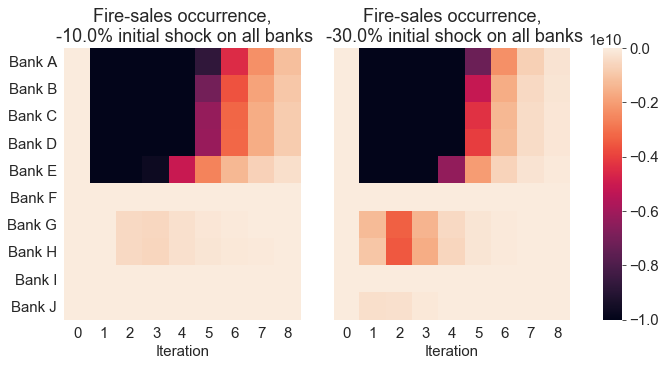

In [73]:







ssetclass = "m_18"
scenarios = [-0.1,-0.3]
 
import os
import pandas as pd
# p=os.getcwd()+'/output/'
# for dir, sub, files in os.walk(p):
#     for f in files:
#         if 'AGENT' in f and 'last' not in f:
#             agents=pd.read_csv(str(dir)+'/'+f)
            
#         if 'SYSTEM' in f and 'last' not in f:
#             system=pd.read_csv(str(dir)+'/'+f)     
agents=pd.read_csv("./output/2020-2/all_AGENTS.csv")
agents=agents.drop_duplicates()
agents=agents[agents.asset==assetclass]        
            
df=agents.filter(like='total_asset_sales') 
step=agents.filter(like='current_step')
shock=agents.shock
heat=pd.concat([df,step,shock],axis=1)
# print(heat)
heat = heat.drop('current_step.1', 1)
heat = heat.drop('current_step.2', 1)
heat = heat.drop('current_step.3', 1)
heat = heat.drop('current_step.4', 1)
heat = heat.drop('current_step.5', 1)
heat = heat.drop('current_step.6', 1)
heat = heat.drop('current_step.7', 1)
heat = heat.drop('current_step.8', 1)
heat = heat.drop('current_step.9', 1)

# heat=heat[heat.columns[:-9]]

# CHOOSE SHOCK
heat10=heat[heat.shock==scenarios[0]]
heat10 = heat10.drop('shock', 1)
t=heat10.T
t['Bank']=t.index

def dfreplace(df, *args, **kwargs):
    s = pd.Series(df.values.flatten())
    s = s.str.replace(*args, **kwargs)
    return s

temp = pd.melt(heat10, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat10, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp10=temp

keys=temp10.bank.unique().tolist()
# names=pd.read_csv('/Users/admin/git_repos/ba900/data/bubbles/2015_12_overview_bank_data.csv')
# names[['id','name']]
# d = {112: 'en', 113: 'es', 114: 'es', 111: 'en'}
print(keys) #IMPORTANT _ MUST BE IN RIGHT ORDER 
values=['Bank C', 'Bank I', "Bank F","Bank B","Bank D","Bank J","Bank G","Bank E","Bank H","Bank A"]
new_dict = dict(zip(keys, values))
##########################
##########################
##########################
heat50=heat[heat.shock==scenarios[-1]]
heat50 = heat50.drop('shock', 1)
t=heat50.T
t['Bank']=t.index

temp = pd.melt(heat50, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat50, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp50=temp



temp50['bank'] = temp50['bank'].map(new_dict)
temp10['bank'] = temp10['bank'].map(new_dict)



import seaborn  as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})
sns.set_style("white")

plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15

# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 15
# plt.rcParams['axes.labelsize'] = 15
# #plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['xtick.labelsize'] = 15
# plt.rcParams['ytick.labelsize'] = 15
# plt.rcParams['legend.fontsize'] = 15
# plt.rcParams['figure.titlesize'] = 16

# mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
cmap1 = sns.diverging_palette(10, 220, sep=80, n=7)

tas_bonds_10 = temp10

tas_bonds_10 
result10 = tas_bonds_10.pivot(index="bank",columns="iteration", values="TAS")

tas_50 =  temp50
result50 = tas_50.pivot(index="bank",columns="iteration", values="TAS")



fig2,(ax1,ax2, axcb) = plt.subplots(1,3, figsize=(10,5),
            gridspec_kw={'width_ratios':[1,1,0.08]})

ax1.get_shared_y_axes().join(ax1,ax2)

#for reverse: "YlGnBu_r"
# center=result_equity_bond_10.loc["ABSA", 4]
g3 = sns.heatmap(result10, vmin=-1e10, vmax=0,cbar=False,ax=ax1)
g3.set_ylabel('')
g3.set_xlabel('Iteration')
g3.set_title('Fire-sales occurrence,\n '+ str(scenarios[0]*100)  +'% initial shock on all banks')
 
g4 = sns.heatmap(result50, vmin=-1e10, vmax=0,ax=ax2, cbar_ax=axcb)
g4.set_ylabel('')
g4.set_xlabel('Iteration')
g4.set_yticks([])
g4.set_title('Fire-sales occurrence,\n '+ str(scenarios[-1]*100)  +'% initial shock on all banks')
# fig2.savefig('fig_heat_all_banks_marketableasset'+str(scenarios[-1]*100)+'.png', format='png', dpi=1000)


plt.show()

# heatmap

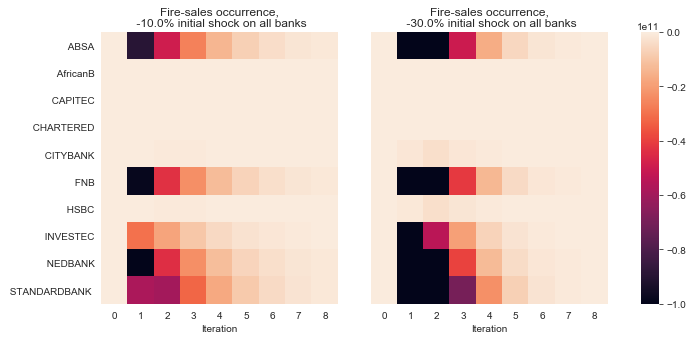

In [57]:
# Make heatmap  
assetclass = "m_18"
scenarios = [-0.1,-0.3]
 
import os
import pandas as pd
# p=os.getcwd()+'/output/'
# for dir, sub, files in os.walk(p):
#     for f in files:
#         if 'AGENT' in f and 'last' not in f:
#             agents=pd.read_csv(str(dir)+'/'+f)
            
#         if 'SYSTEM' in f and 'last' not in f:
#             system=pd.read_csv(str(dir)+'/'+f)     
agents=pd.read_csv("./output/2020-2/all_AGENTS.csv")
agents=agents.drop_duplicates()
agents=agents[agents.asset==assetclass]        
            
df=agents.filter(like='total_asset_sales') 
step=agents.filter(like='current_step')
shock=agents.shock
heat=pd.concat([df,step,shock],axis=1)
# print(heat)
heat = heat.drop('current_step.1', 1)
heat = heat.drop('current_step.2', 1)
heat = heat.drop('current_step.3', 1)
heat = heat.drop('current_step.4', 1)
heat = heat.drop('current_step.5', 1)
heat = heat.drop('current_step.6', 1)
heat = heat.drop('current_step.7', 1)
heat = heat.drop('current_step.8', 1)
heat = heat.drop('current_step.9', 1)

# heat=heat[heat.columns[:-9]]

# CHOOSE SHOCK
heat10=heat[heat.shock==scenarios[0]]
heat10 = heat10.drop('shock', 1)
t=heat10.T
t['Bank']=t.index

def dfreplace(df, *args, **kwargs):
    s = pd.Series(df.values.flatten())
    s = s.str.replace(*args, **kwargs)
    return s

temp = pd.melt(heat10, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat10, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp10=temp

##########################
##########################
##########################
heat50=heat[heat.shock==scenarios[-1]]
heat50 = heat50.drop('shock', 1)
t=heat50.T
t['Bank']=t.index

temp = pd.melt(heat50, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat50, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp50=temp



import seaborn  as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})
sns.set_style("white")

# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 15
# plt.rcParams['axes.labelsize'] = 15
# #plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['xtick.labelsize'] = 15
# plt.rcParams['ytick.labelsize'] = 15
# plt.rcParams['legend.fontsize'] = 15
# plt.rcParams['figure.titlesize'] = 16

# mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
cmap1 = sns.diverging_palette(10, 220, sep=80, n=7)

tas_bonds_10 = temp10

tas_bonds_10 
result10 = tas_bonds_10.pivot(index="bank",columns="iteration", values="TAS")

tas_50 =  temp50
result50 = tas_50.pivot(index="bank",columns="iteration", values="TAS")


fig2,(ax1,ax2, axcb) = plt.subplots(1,3, figsize=(10,5),
            gridspec_kw={'width_ratios':[1,1,0.08]})

ax1.get_shared_y_axes().join(ax1,ax2)

#for reverse: "YlGnBu_r"
# center=result_equity_bond_10.loc["ABSA", 4]
g3 = sns.heatmap(result10, vmin=-1e11, vmax=0,cbar=False,ax=ax1)
g3.set_ylabel('')
g3.set_xlabel('Iteration')
g3.set_title('Fire-sales occurrence,\n '+ str(scenarios[0]*100)  +'% initial shock on all banks')
 
g4 = sns.heatmap(result50, vmin=-1e11, vmax=0,ax=ax2, cbar_ax=axcb)
g4.set_ylabel('')
g4.set_xlabel('Iteration')
g4.set_yticks([])
g4.set_title('Fire-sales occurrence,\n '+ str(scenarios[-1]*100)  +'% initial shock on all banks')
fig2.savefig('fig'+str(scenarios[-1]*100)+'.png', format='png', dpi=1000)


plt.show()

[' FNB', ' CHARTERED', ' CAPITEC', ' ABSA', ' NEDBANK', ' AfricanB', ' CITYBANK', ' INVESTEC', ' HSBC', ' STANDARDBANK ']


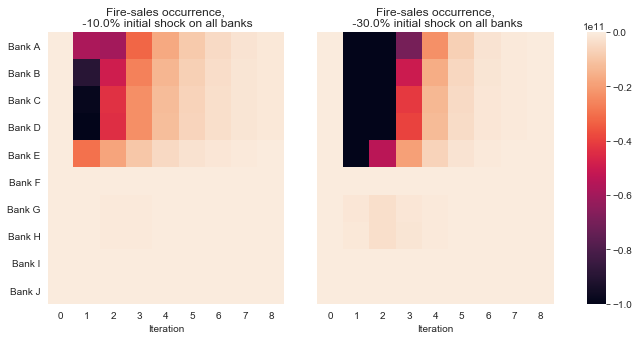

In [63]:







ssetclass = "m_18"
scenarios = [-0.1,-0.3]
 
import os
import pandas as pd
# p=os.getcwd()+'/output/'
# for dir, sub, files in os.walk(p):
#     for f in files:
#         if 'AGENT' in f and 'last' not in f:
#             agents=pd.read_csv(str(dir)+'/'+f)
            
#         if 'SYSTEM' in f and 'last' not in f:
#             system=pd.read_csv(str(dir)+'/'+f)     
agents=pd.read_csv("./output/2020-2/all_AGENTS.csv")
agents=agents.drop_duplicates()
agents=agents[agents.asset==assetclass]        
            
df=agents.filter(like='total_asset_sales') 
step=agents.filter(like='current_step')
shock=agents.shock
heat=pd.concat([df,step,shock],axis=1)
# print(heat)
heat = heat.drop('current_step.1', 1)
heat = heat.drop('current_step.2', 1)
heat = heat.drop('current_step.3', 1)
heat = heat.drop('current_step.4', 1)
heat = heat.drop('current_step.5', 1)
heat = heat.drop('current_step.6', 1)
heat = heat.drop('current_step.7', 1)
heat = heat.drop('current_step.8', 1)
heat = heat.drop('current_step.9', 1)

# heat=heat[heat.columns[:-9]]

# CHOOSE SHOCK
heat10=heat[heat.shock==scenarios[0]]
heat10 = heat10.drop('shock', 1)
t=heat10.T
t['Bank']=t.index

def dfreplace(df, *args, **kwargs):
    s = pd.Series(df.values.flatten())
    s = s.str.replace(*args, **kwargs)
    return s

temp = pd.melt(heat10, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat10, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp10=temp

keys=temp10.bank.unique().tolist()
# names=pd.read_csv('/Users/admin/git_repos/ba900/data/bubbles/2015_12_overview_bank_data.csv')
# names[['id','name']]
# d = {112: 'en', 113: 'es', 114: 'es', 111: 'en'}
print(keys) #IMPORTANT _ MUST BE IN RIGHT ORDER 
values=['Bank C', 'Bank I', "Bank F","Bank B","Bank D","Bank J","Bank G","Bank E","Bank H","Bank A"]
new_dict = dict(zip(keys, values))
##########################
##########################
##########################
heat50=heat[heat.shock==scenarios[-1]]
heat50 = heat50.drop('shock', 1)
t=heat50.T
t['Bank']=t.index

temp = pd.melt(heat50, id_vars=[ 'current_step'])
series=dfreplace(pd.melt(heat50, id_vars=[ 'current_step'], ).variable, 'total_asset_sales' ,"")
temp['bank']=series
temp.columns = ['iteration','old', 'TAS', 'bank']
temp50=temp



temp50['bank'] = temp50['bank'].map(new_dict)
temp10['bank'] = temp10['bank'].map(new_dict)



import seaborn  as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Times New Roman']})
sns.set_style("white")

# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 15
# plt.rcParams['axes.labelsize'] = 15
# #plt.rcParams['axes.labelweight'] = 'bold'
# plt.rcParams['xtick.labelsize'] = 15
# plt.rcParams['ytick.labelsize'] = 15
# plt.rcParams['legend.fontsize'] = 15
# plt.rcParams['figure.titlesize'] = 16

# mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
cmap1 = sns.diverging_palette(10, 220, sep=80, n=7)

tas_bonds_10 = temp10

tas_bonds_10 
result10 = tas_bonds_10.pivot(index="bank",columns="iteration", values="TAS")

tas_50 =  temp50
result50 = tas_50.pivot(index="bank",columns="iteration", values="TAS")



fig2,(ax1,ax2, axcb) = plt.subplots(1,3, figsize=(10,5),
            gridspec_kw={'width_ratios':[1,1,0.08]})

ax1.get_shared_y_axes().join(ax1,ax2)

#for reverse: "YlGnBu_r"
# center=result_equity_bond_10.loc["ABSA", 4]
g3 = sns.heatmap(result10, vmin=-1e11, vmax=0,cbar=False,ax=ax1)
g3.set_ylabel('')
g3.set_xlabel('Iteration')
g3.set_title('Fire-sales occurrence,\n '+ str(scenarios[0]*100)  +'% initial shock on all banks')
 
g4 = sns.heatmap(result50, vmin=-1e11, vmax=0,ax=ax2, cbar_ax=axcb)
g4.set_ylabel('')
g4.set_xlabel('Iteration')
g4.set_yticks([])
g4.set_title('Fire-sales occurrence,\n '+ str(scenarios[-1]*100)  +'% initial shock on all banks')
fig2.savefig('fig'+str(scenarios[-1]*100)+'.png', format='png', dpi=1000)


plt.show()




In [62]:
[' FNB', ' CHARTERED', ' CAPITEC', ' ABSA', ' NEDBANK', ' AfricanB', ' CITYBANK', ' INVESTEC', ' HSBC', ' STANDARDBANK ']

[' FNB',
 ' CHARTERED',
 ' CAPITEC',
 ' ABSA',
 ' NEDBANK',
 ' AfricanB',
 ' CITYBANK',
 ' INVESTEC',
 ' HSBC',
 ' STANDARDBANK ']